In [1]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=4)

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Local modules
from Model import RetirementClass
import funs
import figs

# Global modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Deduction

Single model

In [2]:
with open('estimates/Single.pickle', 'rb') as handle:
    SingleEst = pickle.load(handle)
Single = RetirementClass(SingleEst)
Single.solve()
Single.simulate()

Couple model

In [3]:
#with open('estimates/Couple.pickle', 'rb') as handle:
#    CoupleEst = pickle.load(handle)
# Remember the single_kwargs!!!
Couple = RetirementClass(couple=True)
Couple.solve()
Couple.simulate()

Restricted Couple model

In [22]:
#with open('estimates/CoupleRest.pickle', 'rb') as handle:
#    CoupleRestEst = pickle.load(handle)
# Remember the single_kwargs!!!
CoupleRest = RetirementClass(couple=True, phi_0_male=0.0, phi_0_female=0.0, phi_1=0.0)
CoupleRest.solve()
CoupleRest.simulate()

Resolve model for different deductions

In [6]:
x = np.linspace(0,2,10)
policyF_S = figs.resolve(Single, vars=['d'], recompute=True, fradrag=x)

In [7]:
policyF_C = figs.resolve_c(Couple, vars=['d'], recompute=True, fradrag=x)

In [24]:
policyF_CR = figs.resolve_c(CoupleRest, vars=['d'], recompute=True, fradrag=x)

In [25]:
Yf = [policyF_S['d'], policyF_C['d'], policyF_CR['d']]
for j in range(len(Y)):
    Yf[j] = [(i/Yf[j][0]-1)*100 for i in Yf[j][1:]] # list comprehension to compute relative change
names = ['Single model', 'Couple model', 'Restricted Couple model']
xlab = 'Deduction (100.000 DKR)'
ylab = 'Relative change (labor supply)'

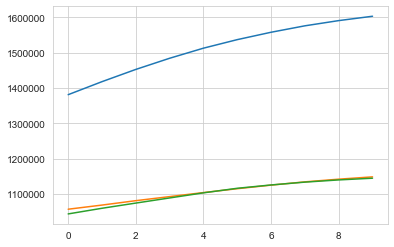

In [38]:
plt.plot(policyF_CR['d'])
plt.plot(policyF_C['d'])
plt.plot(np.array(policyF_S['d'])*2)

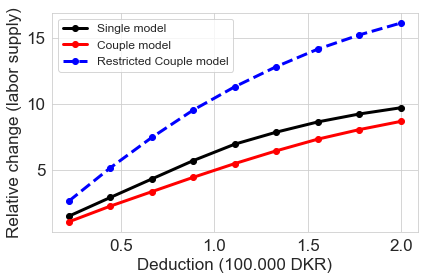

In [40]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
figs.plot_exp(x[1:],Y,ax,names,xlab,ylab)
fig.tight_layout()
fig.savefig('figs/Experiments/DeductionLaborSupply.png')

# Increase retirement age

Single model

In [2]:
with open('estimates/Single.pickle', 'rb') as handle:
    SingleEst = pickle.load(handle)
Single = RetirementClass(SingleEst)
Single.solve()
Single.simulate()

Couple model

In [3]:
#with open('estimates/Couple.pickle', 'rb') as handle:
#    CoupleEst = pickle.load(handle)
# Remember the single_kwargs!!!
Couple = RetirementClass(couple=True)
Couple.solve()
Couple.simulate()

Restricted Couple model

In [4]:
#with open('estimates/CoupleRest.pickle', 'rb') as handle:
#    CoupleRestEst = pickle.load(handle)
# Remember the single_kwargs!!!
CoupleRest = RetirementClass(couple=True, phi_0_male=0.0, phi_0_female=0.0, phi_1=0.0)
CoupleRest.solve()
CoupleRest.simulate()

Resolve model for different retirement ages

In [6]:
oap = 65
two_year = 62
erp = 60
kwarg_dict = {'oap_age':   [oap, oap+1, oap+2, oap+3, oap+4, oap+5],
              'two_year':  [two_year, two_year+1, two_year+2, two_year+3, two_year+4, two_year+5],
              'erp_age':   [erp, erp+1, erp+2, erp+3, erp+4, erp+5]}
policyRA_S = figs.resolve(Single,vars=['d'],recompute=True, **kwarg_dict)

In [7]:
policyRA_C = figs.resolve_c(Couple,vars=['d'],recompute=True, **kwarg_dict)

MemoryError: 

In [ ]:
policyRA_CR = figs.resolve_c(CoupleRest,vars=['d'],recompute=True, **kwarg_dict)

In [ ]:
x = [1,2,3,4,5]
Yra = [policyRA_S['d'], policyRA_C['d'], policyRA_CR['d']]
for j in range(len(Y)):
    Yra[j] = [(i/Yra[j][0]-1)*100 for i in Yra[j][1:]] # list comprehension to compute relative change
names = ['Single model', 'Couple model', 'Restricted Couple model']
xlab = 'Increase in age (years)'
ylab = 'Relative change (labor supply)'

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
figs.plot_exp(x[1:],Yra,ax,names,xlab,ylab)
fig.tight_layout()
fig.savefig('figs/Experiments/DeductionLaborSupply.png')

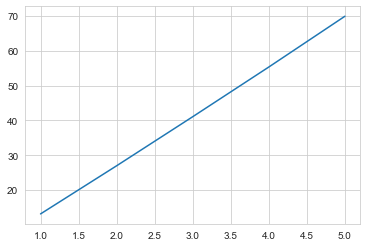

In [49]:
x = [1,2,3,4,5]
y = policy_age['d']
y = [(i/y[0]-1)*100 for i in y[1:]]
plt.plot(x,y)

# Couple model

In [3]:
model = RetirementClass(couple=True)
model.solve()
model.simulate()

In [3]:
fradrag = model.par.fradrag # to reset
x = np.linspace(0,2,10)
policy_fradrag = figs.resolve_c(model,vars=['d'],recompute=True, fradrag=x)
model.par.fradrag = fradrag
model.solve(recompute=True)

In [ ]:
phi_0_male = model.par.phi_0_male
phi_0_female = model.par.phi_0_female
phi_1 = model.par.phi_1
model.par.phi_0_male = 0.0
model.par.phi_0_female = 0.0
model.par.phi_1 = 0.0

policy_fradrag_partial = figs.resolve_c(model,vars=['d'],recompute=True, fradrag=x)
model.par.fradrag = fradrag
model.par.phi_0_male = phi_0_male
model.par.phi_0_female = phi_0_female
model.par.phi_1 = phi_1
model.solve(recompute=True)

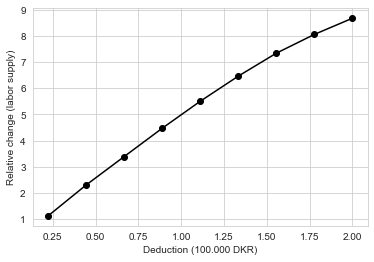

In [23]:
x = np.linspace(0,2,10)
y = policy_fradrag['d']
y = [(i/y[0]-1)*100 for i in y[1:]]
y_partial = policy_fradrag_partial['d']
y_partial = [(i/y_partial[0]-1)*100 for i in y_partial[1:]]
fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(x[1:],y,'k-o', label='Baseline')
ax.plot(x[1:],y_partial,'k-o', label='Without complementarities')
ax.set_ylabel('Relative change (labor supply)')
ax.set_xlabel('Deduction (100.000 DKR)')
fig.savefig('figs/experiment_full_couple_fradrag_labor_supply.png')

In [4]:
oap = model.par.oap_age
two_year = model.par.two_year
erp = model.par.erp_age
kwarg_dict = {'oap_age':   [oap, oap+1, oap+2, oap+3, oap+4, oap+5],
              'two_year':  [two_year, two_year+1, two_year+2, two_year+3, two_year+4, two_year+5],
              'erp_age':   [erp, erp+1, erp+2, erp+3, erp+4, erp+5]}
policy_age = figs.resolve_c(model,vars=['d'],recompute=True, **kwarg_dict)
model.par.oap_age = oap
model.par.two_year = two_year
model.par.erp_age = erp
model.solve(recompute=True)

In [5]:
phi_0_male = model.par.phi_0_male
phi_0_female = model.par.phi_0_female
phi_1 = model.par.phi_1
model.par.phi_0_male = 0.0
model.par.phi_0_female = 0.0
model.par.phi_1 = 0.0

policy_age_partial = figs.resolve_c(model,vars=['d'],recompute=True, **kwarg_dict)
model.par.oap_age = oap
model.par.two_year = two_year
model.par.erp_age = erp
model.par.phi_0_male = phi_0_male
model.par.phi_0_female = phi_0_female
model.par.phi_1 = phi_1
model.solve(recompute=True)

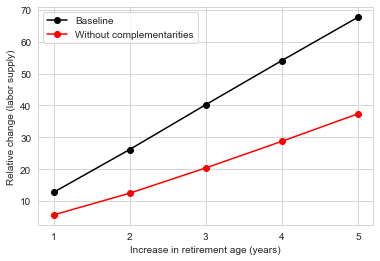

In [16]:
x = [1,2,3,4,5]
y = policy_age['d']
y = [(i/y[0]-1)*100 for i in y[1:]]
y_partial = policy_age_partial['d']
y_partial = [(i/y_partial[0]-1)*100 for i in y_partial[1:]]
fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(x,y,'k-o', label='Baseline')
ax.plot(x,y_partial,'r-o', label='Without complementarities')
ax.set_xticks(x)
ax.legend()
ax.set_ylabel('Relative change (labor supply)')
ax.set_xlabel('Increase in retirement age (years)')
fig.savefig('figs/experiment_full_couple_retirement_age_labor_supply.png')

In [44]:
model.par.oap_age = 65
model.par.two_year = 62
model.par.erp_age = 60
model.solve(recompute=True)
model.simulate(recompute=True)
figs.policy_simulation(model)

215899.0

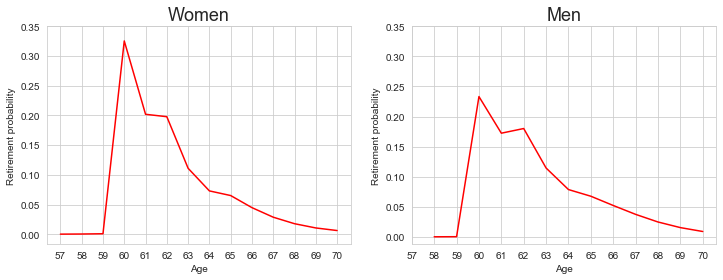

In [46]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
figs.retirement_probs_c(model,axs[0],ma=0,ages=[57,70])
figs.retirement_probs_c(model,axs[1],ma=1,ages=[57,70])
axs[0].set_title('Women',size=18)
axs[1].set_title('Men',size=18)
plt.show()

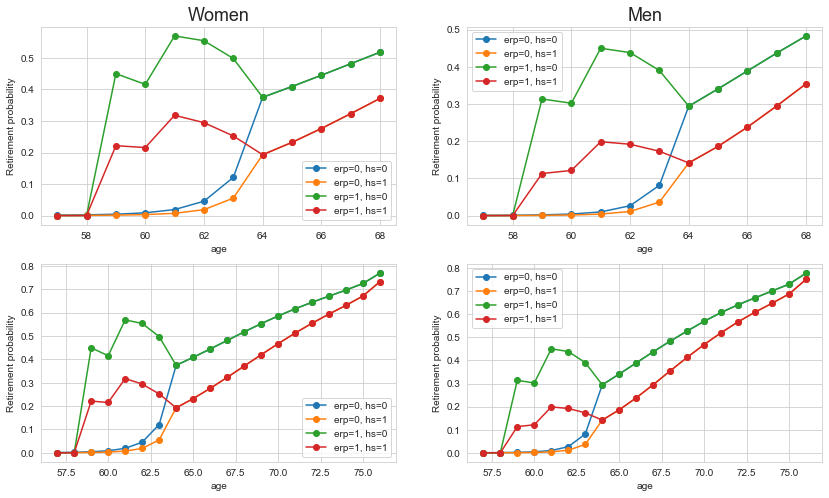

In [47]:
fig, axs = plt.subplots(2,2,figsize=(14,8))
figs.choice_probs_c(model,axs[0,0],ma=0,ST=[0,1,2,3],ad=0)
figs.choice_probs_c(model,axs[0,1],ma=1,ST=[0,1,2,3],ad=0)
figs.choice_probs_c(model,axs[1,0],ma=0,ST=[0,1,2,3],ad=0, ages=[57,77])
figs.choice_probs_c(model,axs[1,1],ma=1,ST=[0,1,2,3],ad=0, ages=[57,77])
axs[0,0].set_title('Women',size=18)
axs[0,1].set_title('Men',size=18)
plt.show()

In [60]:
model.par.oap_age = 65+1
model.par.two_year = 62+1
model.par.erp_age = 60+1
model.Single.par.oap_age = 65+1
model.Single.par.two_year = 62+1
model.Single.par.erp_age = 60+1
model.solve(recompute=True)
model.simulate(recompute=True)
figs.policy_simulation(model)

249141.0

C:\Users\Frederik\Desktop\github\Main\figs.py:456: RuntimeWarning: Mean of empty slice
  ax.plot(x,np.nanmean(y,axis=0),'r',label='Predicted')


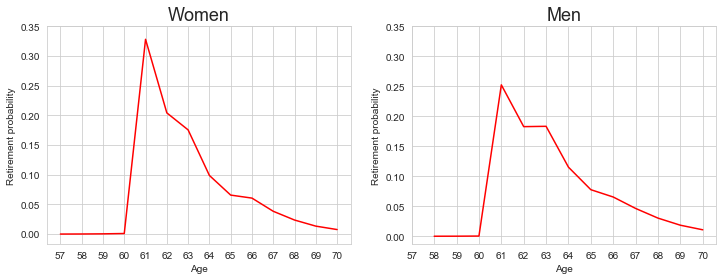

In [61]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
figs.retirement_probs_c(model,axs[0],ma=0,ages=[57,70])
figs.retirement_probs_c(model,axs[1],ma=1,ages=[57,70])
axs[0].set_title('Women',size=18)
axs[1].set_title('Men',size=18)
plt.show()

In [22]:
test = model

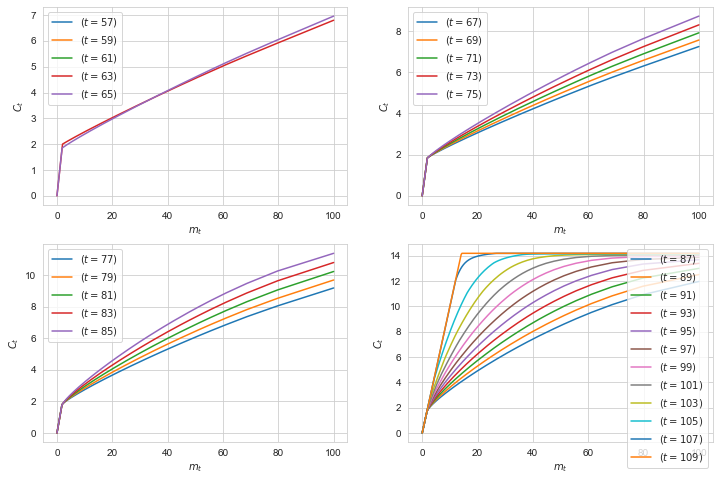

In [25]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(10))
figs.policy_c(test,axs[0,0],var='c',T=time[::2],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[0],label=['t'])
time = list(range(10,20))
figs.policy_c(test,axs[0,1],var='c',T=time[::2],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[0],label=['t'])
time = list(range(20,30))
figs.policy_c(test,axs[1,0],var='c',T=time[::2],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[0],label=['t'])
time = list(range(30,54))
figs.policy_c(test,axs[1,1],var='c',T=time[::2],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[0],label=['t'])
plt.show()

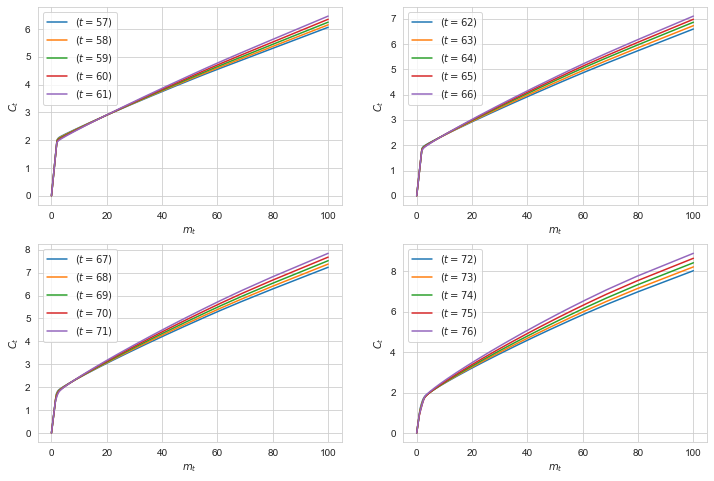

In [24]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(5))
figs.policy_c(test,axs[0,0],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[1],label=['t'])
time = list(range(5,10))
figs.policy_c(test,axs[0,1],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[1],label=['t'])
time = list(range(10,15))
figs.policy_c(test,axs[1,0],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[1],label=['t'])
time = list(range(15,20))
figs.policy_c(test,axs[1,1],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[1],label=['t'])
plt.show()

In [2]:
model_base = RetirementClass(name='baseline')
model_base.solve()
model_base.simulate()

In [3]:
model_ra = RetirementClass(name='increase_Rage', oap_age=66, two_year=63, erp_age=61)
model_ra.solve()
model_ra.simulate()

In [4]:
model_tax = RetirementClass(name='fradrag', fradrag=1.0)
model_tax.solve()
model_tax.simulate()

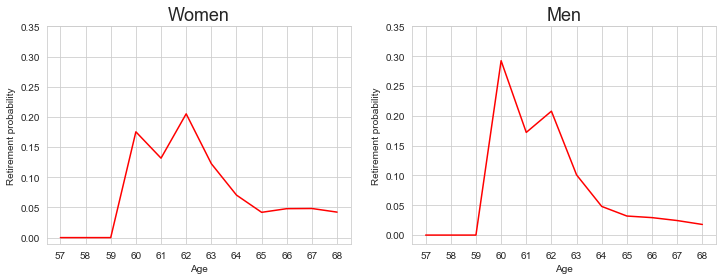

In [5]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
figs.retirement_probs(model_base,axs[0],male=0,states=[0,1,2,3])
figs.retirement_probs(model_base,axs[1],male=1,states=[0,1,2,3])
axs[0].set_title('Women',size=18)
axs[1].set_title('Men',size=18)
plt.show()

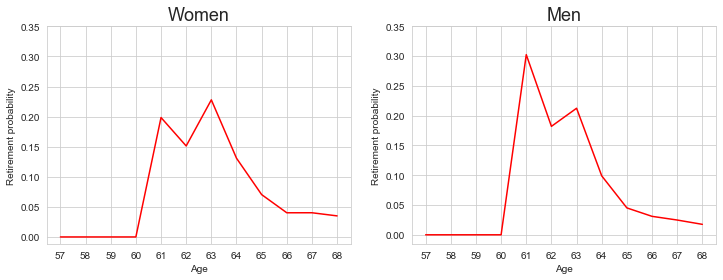

In [6]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
figs.retirement_probs(model_ra,axs[0],male=0,states=[0,1,2,3])
figs.retirement_probs(model_ra,axs[1],male=1,states=[0,1,2,3])
axs[0].set_title('Women',size=18)
axs[1].set_title('Men',size=18)
plt.show()

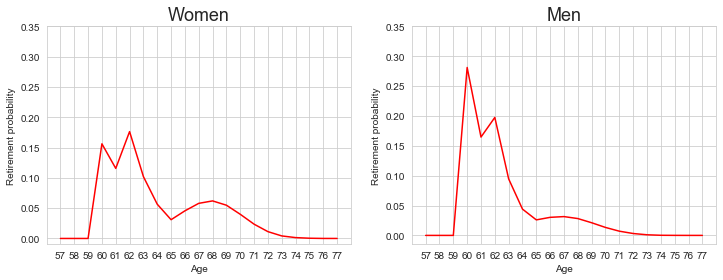

In [7]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
figs.retirement_probs(model_tax,axs[0],male=0,states=[0,1,2,3],ages=[57,77])
figs.retirement_probs(model_tax,axs[1],male=1,states=[0,1,2,3],ages=[57,77])
axs[0].set_title('Women',size=18)
axs[1].set_title('Men',size=18)
plt.show()

### Percentage difference in retirement probabilities

In [8]:
ages,probs_base = figs.retirement_probs(model_base,None,male=0,states=[0,1,2,3],plot=False)
probs_ra = figs.retirement_probs(model_ra,None,male=0,states=[0,1,2,3],plot=False)[1]
probs_tax = figs.retirement_probs(model_tax,None,male=0,states=[0,1,2,3],plot=False)[1]

C:\Users\Frederik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


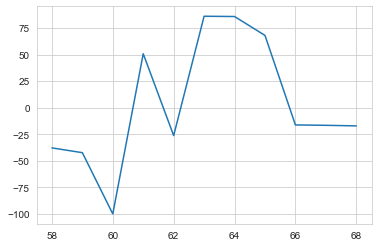

In [9]:
plt.plot(ages,(probs_ra/probs_base-1)*100)

C:\Users\Frederik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


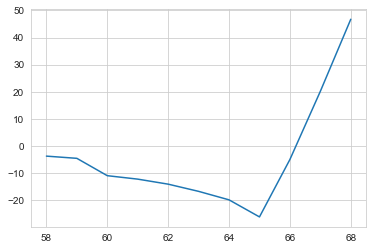

In [10]:
plt.plot(ages,(probs_tax/probs_base-1)*100)

### Actual difference in labor supply

In [11]:
import transitions
par_base = model_base.par
par_ra = model_ra.par
par_tax = model_tax.par
ages = [57,68]
x = np.arange(ages[0], ages[1]+1)
base = model_base.sim.d[transitions.inv_age(x,par_base)]
y_base = np.sum(base==1,axis=1)

ra = model_ra.sim.d[transitions.inv_age(x,par_ra)]
y_ra = np.sum(ra==1,axis=1)

tax = model_tax.sim.d[transitions.inv_age(x,par_tax)]
y_tax = np.sum(tax==1,axis=1)

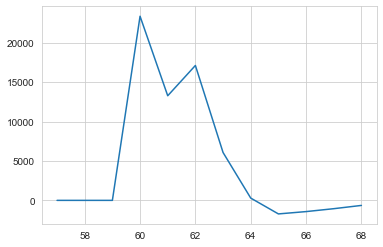

In [12]:
plt.plot(x,(y_ra-y_base))

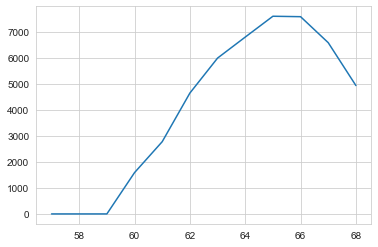

In [13]:
plt.plot(x,(y_tax-y_base))

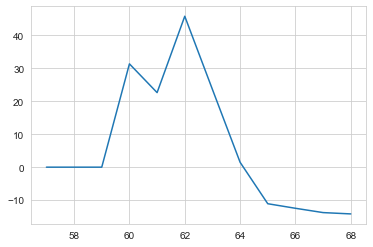

In [14]:
plt.plot(x,(y_ra/y_base-1)*100)

### Cumulative change in labor supply

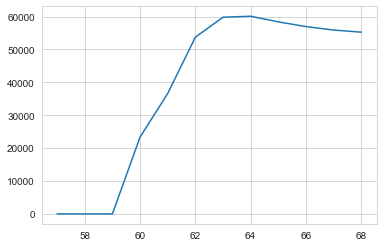

In [15]:
plt.plot(x,np.cumsum(y_ra-y_base))

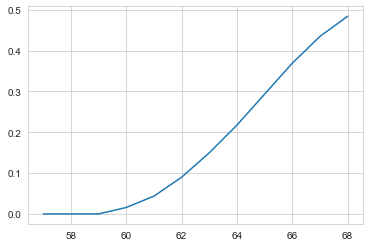

In [16]:
plt.plot(x,np.cumsum(y_tax-y_base)/par_base.simN)